In [34]:
## import libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import os

In [ ]:
print(os.getcwd())

C:\Users\chintu reddy\Desktop\Super Data Science\Machine Learning Classififcation Bootcamp


In [ ]:
tshirt = pd.read_csv('Tshirt_Sizing_Dataset.csv')

In [ ]:
tshirt


,Height (in cms),Weight (in kgs),T Shirt Size
0,158,58,S
1,158,59,S
2,158,63,S
3,160,59,S
4,160,60,S
5,163,60,S
6,163,61,S
7,160,64,L
8,163,64,L
9,165,61,L


In [ ]:
tshirt.head()

,Height (in cms),Weight (in kgs),T Shirt Size
0,158,58,S
1,158,59,S
2,158,63,S
3,160,59,S
4,160,60,S


In [ ]:
tshirt.tail()

,Height (in cms),Weight (in kgs),T Shirt Size
13,168,63,L
14,168,66,L
15,170,63,L
16,170,64,L
17,170,68,L


In [ ]:
tshirt.describe()

,Height (in cms),Weight (in kgs)
count,18.00000,18.000000
mean,164.00000,62.333333
std,4.32503,2.634611
min,158.00000,58.000000
25%,160.00000,60.250000
50%,164.00000,62.500000
75%,168.00000,64.000000
max,170.00000,68.000000


In [ ]:
tshirt.shape

(18, 3)

In [ ]:
tshirt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 3 columns):
Height (in cms)    18 non-null int64
Weight (in kgs)    18 non-null int64
T Shirt Size       18 non-null object
dtypes: int64(2), object(1)
memory usage: 512.0+ bytes


# creating testing and training datatset

In [ ]:
X = tshirt.iloc[:, 0:2].values

In [ ]:
X

array([[158,  58],
       [158,  59],
       [158,  63],
       [160,  59],
       [160,  60],
       [163,  60],
       [163,  61],
       [160,  64],
       [163,  64],
       [165,  61],
       [165,  62],
       [165,  65],
       [168,  62],
       [168,  63],
       [168,  66],
       [170,  63],
       [170,  64],
       [170,  68]], dtype=int64)

In [ ]:
Y = tshirt.iloc[:, 2].values

In [ ]:
Y

array(['S', 'S', 'S', 'S', 'S', 'S', 'S', 'L', 'L', 'L', 'L', 'L', 'L',
       'L', 'L', 'L', 'L', 'L'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
Y = labelencoder_y.fit_transform(Y)

In [ ]:
Y

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 5)

In [ ]:
X_train.shape

(13, 2)

In [ ]:
X_train

array([[170,  68],
       [168,  62],
       [160,  64],
       [160,  60],
       [163,  64],
       [165,  61],
       [158,  58],
       [170,  64],
       [163,  61],
       [168,  63],
       [170,  63],
       [168,  66],
       [160,  59]], dtype=int64)

In [ ]:
X_test

array([[163,  60],
       [158,  59],
       [165,  62],
       [158,  63],
       [165,  65]], dtype=int64)

In [ ]:
Y_train

array([0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1])

In [ ]:
Y_test

array([1, 1, 0, 1, 0])

In [ ]:
# Model training

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p =2)
classifier.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [ ]:
y_pred  = classifier.predict(X_test)

In [ ]:
y_pred

array([1, 1, 0, 1, 0])

In [ ]:
Y_test

array([1, 1, 0, 1, 0])

In [ ]:
# test results with visualization

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)

In [ ]:
sns.heatmap(cm, annot = True)

In [ ]:
# Testing _set visualizations

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


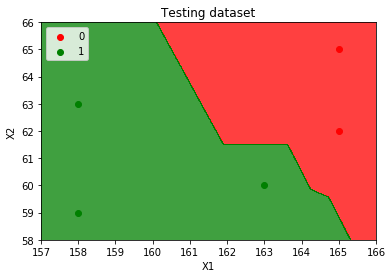

In [72]:
# Visualising the Testing set results
from matplotlib.colors import ListedColormap
X_grid, y_grid = X_test, Y_test
X1, X2 = np.meshgrid(np.arange(start = X_grid[:, 0].min() - 1, stop = X_grid[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_grid[:, 1].min() - 1, stop = X_grid[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_grid)):
    plt.scatter(X_grid[y_grid == j, 0], X_grid[y_grid == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
    
plt.title('Testing dataset')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()

In [ ]:
# All the variables are classified  precisely